## EXPERIMENT 2_2: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed

from scipy.stats import describe, gaussian_kde
import math


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_2/'


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.2/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_2.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/2.2/feature_vectors_from_adults_bibel_cropped_retina_all_finetuning_ex_2_2.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [8]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.1549206349206349
GARBE result, GARBE close to 1 means more unfair:  0.11619047619047618
Done for random_state: 1, percentile: 0.0
FPD result:  0.0
FND result:  0.28541716606269124
GARBE result, GARBE close to 1 means more unfair:  0.21406287454701844
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.3485600366210452
GARBE result, GARBE close to 1 means more unfair:  0.26142002746578386
Done for random_state: 1, percentile: 0.2
FPD result:  0.0
FND result:  0.3691543785735781
GARBE result, GARBE close to 1 means more unfair:  0.2768657839301836
Done for random_state: 1, percentile: 0.30000000000000004
FPD result:  0.004759061821778859
FND result:  0.3028322763415221
GARBE result, GARBE close to 1 means more unfair:  0.2283139727115863
Done for random_state: 1, percentile: 0.4
FPD result:  0.002730383977888755
FND result:  0.218229138087949
GARBE result, GARBE close to 1 means more unfair:  0.16435444956043394
Done for random_state:

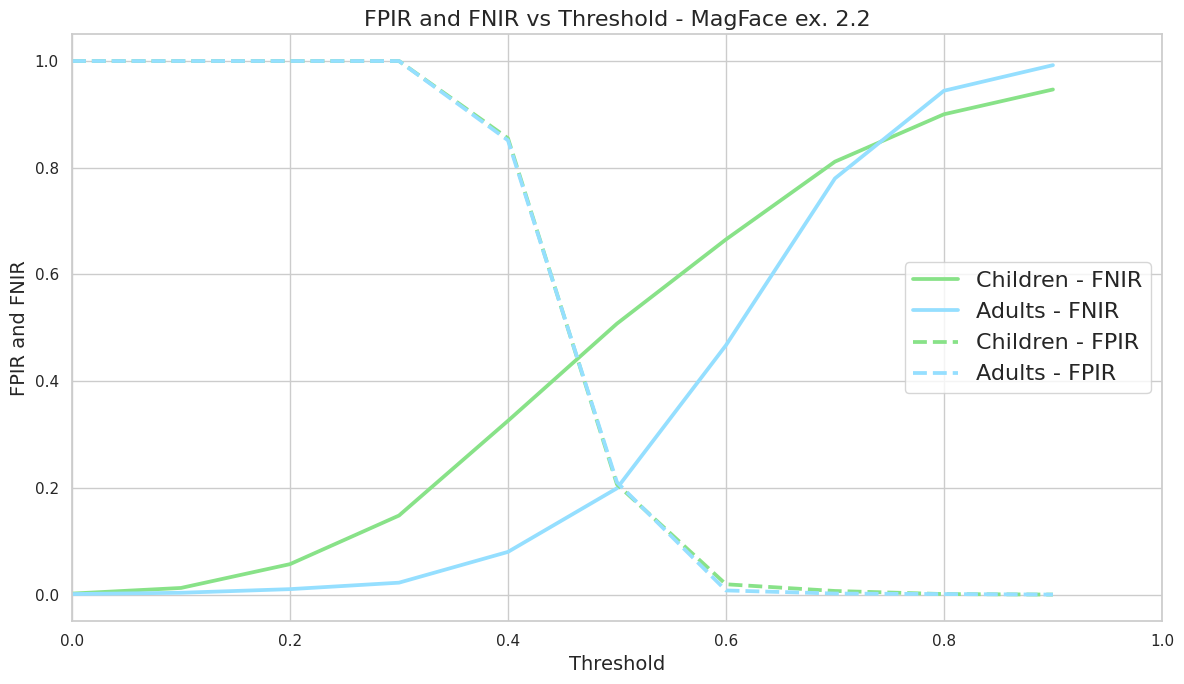

In [9]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'MagFace ex. 2.2', save_fig_path)

# Stats - 10 experiments

In [10]:

random_states = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


FPD result:  0.0
FND result:  0.11225777061358937
GARBE result, GARBE close to 1 means more unfair:  0.08419332796019202
done
FPD result:  0.0
FND result:  0.08656419405750361
GARBE result, GARBE close to 1 means more unfair:  0.06492314554312771
done
FPD result:  0.0
FND result:  0.3063037599498877
GARBE result, GARBE close to 1 means more unfair:  0.22972781996241576
done
FPD result:  0.0
FND result:  0.05999653199237038
GARBE result, GARBE close to 1 means more unfair:  0.044997398994277786
done
FPD result:  0.0
FND result:  0.11309101235269063
GARBE result, GARBE close to 1 means more unfair:  0.08481825926451797
done
FPD result:  0.0
FND result:  0.07652163499184714
GARBE result, GARBE close to 1 means more unfair:  0.05739122624388535
done
FPD result:  0.0
FND result:  0.07504798464491362
GARBE result, GARBE close to 1 means more unfair:  0.05628598848368521
done
FPD result:  0.0
FND result:  0.21630928540028327
GARBE result, GARBE close to 1 means more unfair:  0.162231964050212

In [11]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.014 & 0.009 & 1.000 & 1.000 & 0.000 & 0.112 & 0.084 & 0.100 \\
\textbf{1} & 0.017 & 0.012 & 1.000 & 1.000 & 0.000 & 0.087 & 0.065 & 0.100 \\
\textbf{2} & 0.012 & 0.003 & 1.000 & 1.000 & 0.000 & 0.306 & 0.230 & 0.100 \\
\textbf{3} & 0.017 & 0.013 & 1.000 & 1.000 & 0.000 & 0.060 & 0.045 & 0.100 \\
\textbf{4} & 0.011 & 0.007 & 1.000 & 1.000 & 0.000 & 0.113 & 0.085 & 0.100 \\
\textbf{5} & 0.013 & 0.010 & 1.000 & 1.000 & 0.000 & 0.077 & 0.057 & 0.100 \\
\textbf{6} & 0.014 & 0.011 & 1.000 & 1.000 & 0.000 & 0.075 & 0.056 & 0.100 \\
\textbf{7} & 0.019 & 0.008 & 1.000 & 1.000 & 0.000 & 0.216 & 0.162 & 0.100 \\
\textbf{8} & 0.015 & 0.009 & 1.000 & 1.000 & 0.000 & 0.134 & 0.101 & 0.100 \\
\textbf{9} & 0.016 & 0.003 & 1.000 & 1.000 & 0.000 & 0.329 & 0.246 & 0.100 

/tmp/ipykernel_5735/3395561937.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [12]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.015 & 0.008 & 1.000 & 1.000 & 0.000 & 0.151 & 0.113 & 0.100 \\
\textbf{std} & 0.002 & 0.003 & 0.000 & 0.000 & 0.000 & 0.098 & 0.074 & 0.000 \\
\textbf{min} & 0.011 & 0.003 & 1.000 & 1.000 & 0.000 & 0.060 & 0.045 & 0.100 \\
\textbf{25%} & 0.014 & 0.007 & 1.000 & 1.000 & 0.000 & 0.079 & 0.059 & 0.100 \\
\textbf{50%} & 0.015 & 0.009 & 1.000 & 1.000 & 0.000 & 0.113 & 0.085 & 0.100 \\
\textbf{75%} & 0.016 & 0.010 & 1.000 & 1.000 & 0.000 & 0.196 & 0.147 & 0.100 \\
\textbf{max} & 0.019 & 0.013 & 1.000 & 1.000 & 0.000 & 0.329 & 0.246 & 0.100 \\
\bottomrule
\end{tabular} 
\end{table}



/tmp/ipykernel_5735/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [ ]:
df_all_results.to_csv('df_all_results_mag_2_2.csv', index=False)


# Stats

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Gemmer simscores

In [13]:
df_all_results.to_csv('results_10_experiment_2_2_magface.csv')

In [14]:

def combine_and_save_arrays(sim_mat_dict, prefix, range_start, range_end, output_filename):
    # List to hold all the arrays
    combined_iterations = []

    # Loop to access each array and append it to the list
    for i in range(range_start, range_end):
        key = f'{prefix}_iteration_{i}'
        if key in sim_mat_dict:
            combined_iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    combined_iterations_all = np.concatenate(combined_iterations)
    combined_iterations_all = pd.DataFrame(combined_iterations_all)
    combined_iterations_all.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(combined_iterations_all))


combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_enrolled', 11, 21, 'sim_mat_c_enrolled_iterations_all_2_2_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_enrolled', 11, 21, 'sim_mat_a_enrolled_iterations_all_2_2_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_non_enrolled', 11, 21, 'sim_mat_c_non_enrolled_iterations_all_2_2_mag.csv')
combine_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_non_enrolled', 11, 21, 'sim_mat_a_non_enrolled_iterations_all_2_2_mag.csv')


124748
41822
32872996
32603172


# Loading pre-saved stuff

In [15]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_2_2_mag.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_2_2_mag.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_2_2_mag.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_2_2_mag.csv')).values.flatten()


In [16]:

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [27]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41822.000000,3.260317e+07
1,Minimum,-0.099193,-4.681861e-01
2,Maximum,0.968667,9.184902e-01
3,Mean,0.636594,7.207191e-02
4,St. Dev.,0.136085,1.034132e-01
5,Skewness,-0.796289,1.906670e-01
6,Ex. Kurtosis,2.115129,2.107555e-01


In [28]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)


,Statistic,Mated,Non-mated
0,Observations,124748.000000,3.287300e+07
1,Minimum,-0.077659,-4.999228e-01
2,Maximum,0.997986,9.999546e-01
3,Mean,0.524428,4.574163e-02
4,St. Dev.,0.181722,1.143143e-01
5,Skewness,-0.121482,1.431540e-01
6,Ex. Kurtosis,-0.343342,2.171249e-02


In [29]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [34]:
plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.2', save_fig_path=save_fig_path)


In [35]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 2.2', save_fig_path=save_fig_path)


# DET curves

In [36]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 4.67099
d' adult = 3.15327


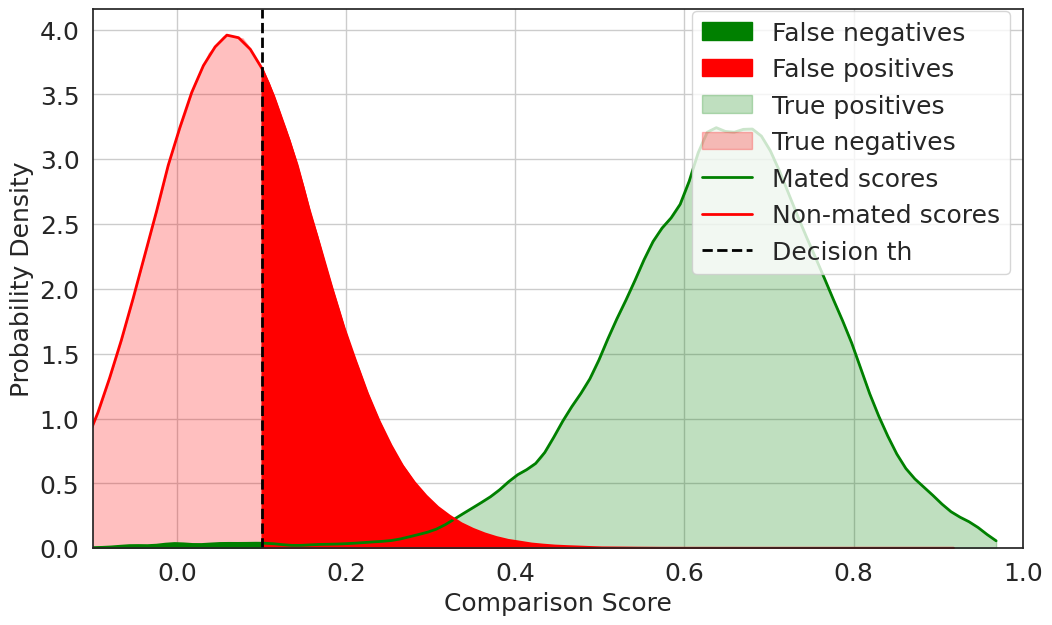

In [46]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='Adults - MagFace ex. 2.2')

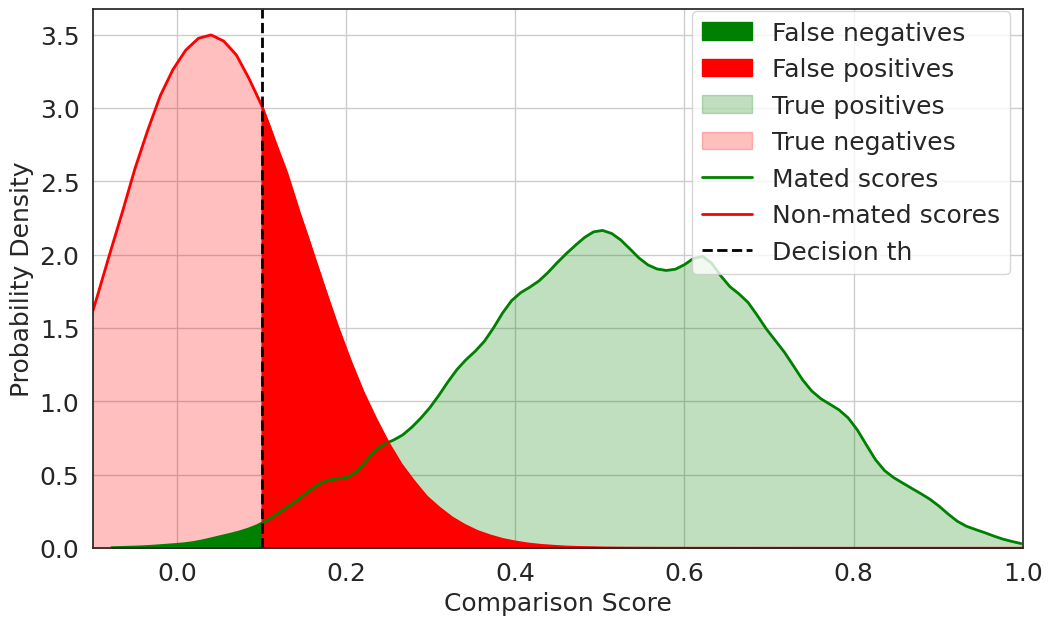

In [47]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='Children - MagFace ex. 2.2')

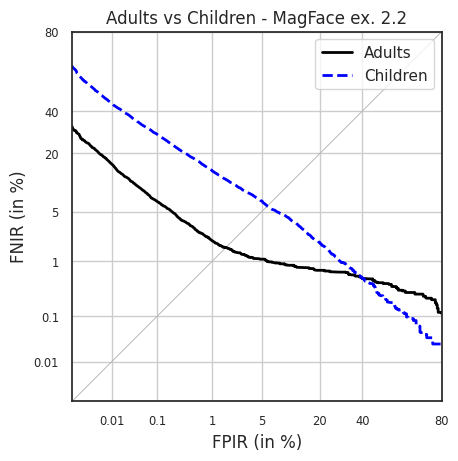

In [63]:

DET_plotting_1_1('Adults vs Children - MagFace ex. 2.2', save_fig_path= save_fig_path)
